# **데이터 다루기 복습**


## 0.환경준비 + 데이터 로드

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* 데이터 가져오기

In [2]:
sales = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/sales.csv")
products = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/products.csv")
#products.drop('Categoryrd', axis =1, inplace = True)
customers = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/customers2.csv")

In [3]:
sales.head() #트랜젝션데이터

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,107,2,2016-01-02,p1036481,2,2100,c150417
1,69,1,2016-01-02,p1152861,1,1091,c212716
2,69,7,2016-01-02,p1013161,1,2600,c212716
3,69,8,2016-01-02,p1005771,1,1650,c212716
4,69,11,2016-01-02,p1089531,1,2600,c212716


In [5]:
products.head() #마스터데이터

,ProductID,ProductName,Category,SubCategory
0,p1052661,새우깡,간식,과자
1,p1054261,고구마스틱,간식,과자
2,p1097821,짱구,간식,과자
3,p1097831,감자칩,간식,과자
4,p1119071,뿌셔뿌셔,간식,과자


In [6]:
customers.head()

,CustomerID,RegisterDate,Gender,BirthYear
0,c328222,2014-09-25,F,1960
1,c281448,2013-06-18,F,1974
2,c038336,2003-10-10,F,1968
3,c084237,2007-03-09,F,1982
4,c162600,2010-06-14,F,1978


## 1.데이터프레임 조건 조회하기 : .loc

In [5]:
# 1. 구매액(Amt)이 10000원 이상인 판매정보를 조회하시오.
# sales.loc[행 조건  , 열 이름]
# sales.loc[행 조건]
sales.loc[sales['Amt']>=10000]

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
36,45,8,2016-01-02,p1194801,2,16400,c274126
92,3,7,2016-01-02,p1194801,2,16400,c171257
266,45,24,2016-01-04,p1194801,2,16400,c085558
268,45,29,2016-01-04,p1178011,2,17600,c085558
574,47,5,2016-01-05,p1162631,3,13800,c307738
...,...,...,...,...,...,...,...
69883,53,1,2017-03-31,p1002841,1,10700,c044830
69895,65,8,2017-03-31,p1139701,10,10450,c219362
69921,83,3,2017-03-31,p1002841,1,10700,c110521
69948,155,7,2017-03-31,p1002841,1,10700,c261935


In [6]:
# 2. 2016년 2월 판매 정보를 조회하시오.
# 조건 두개 이상 연결 &(and), |(or), 주의사항 : 조건 각각을 ()로 묶어야한다.

sales.loc[(sales['OrderDate']>='2016-02-01') & (sales['OrderDate']<'2016-03-01')]

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
4499,241,8,2016-02-01,p1012811,2,5000,c206248
4500,241,9,2016-02-01,p1012751,2,2700,c206248
4501,241,11,2016-02-01,p1144371,5,14250,c206248
4502,241,12,2016-02-01,p1179241,1,1500,c206248
4503,241,13,2016-02-01,p1013161,4,12000,c206248
...,...,...,...,...,...,...,...
8851,25,11,2016-02-29,p1191881,1,1750,c146132
8852,25,12,2016-02-29,p1207281,1,2600,c146132
8853,25,14,2016-02-29,p1005621,1,2900,c146132
8854,25,19,2016-02-29,p1012751,1,1500,c146132


In [9]:
# 🤔3. 2번 문제를 .between()을 사용해서 조회해보세요.
sales.loc[sales['OrderDate'].between('2016-02-01', '2016-02-29')]

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
4499,241,8,2016-02-01,p1012811,2,5000,c206248
4500,241,9,2016-02-01,p1012751,2,2700,c206248
4501,241,11,2016-02-01,p1144371,5,14250,c206248
4502,241,12,2016-02-01,p1179241,1,1500,c206248
4503,241,13,2016-02-01,p1013161,4,12000,c206248
...,...,...,...,...,...,...,...
8851,25,11,2016-02-29,p1191881,1,1750,c146132
8852,25,12,2016-02-29,p1207281,1,2600,c146132
8853,25,14,2016-02-29,p1005621,1,2900,c146132
8854,25,19,2016-02-29,p1012751,1,1500,c146132


In [10]:
#더 좋은 표현
sales.loc[sales['OrderDate'].between('2016-02-01', '2016-03-01', inclusive = 'left')]

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
4499,241,8,2016-02-01,p1012811,2,5000,c206248
4500,241,9,2016-02-01,p1012751,2,2700,c206248
4501,241,11,2016-02-01,p1144371,5,14250,c206248
4502,241,12,2016-02-01,p1179241,1,1500,c206248
4503,241,13,2016-02-01,p1013161,4,12000,c206248
...,...,...,...,...,...,...,...
8851,25,11,2016-02-29,p1191881,1,1750,c146132
8852,25,12,2016-02-29,p1207281,1,2600,c146132
8853,25,14,2016-02-29,p1005621,1,2900,c146132
8854,25,19,2016-02-29,p1012751,1,1500,c146132


* .between() : https://pandas.pydata.org/docs/reference/api/pandas.Series.between.html

In [7]:
products['SubCategory'].unique()

array(['과자', '빵', '사탕류', '과수', '과채', '아이스크림', '요거트', '우유', '두부', '나물류',
       '버섯', '뿌리채소', '열매채소', '잎채소'], dtype=object)

In [8]:
# 4. 상품들 중에서 하위 카테고리(SubCategory)가 사탕류, 과자, 빵 인 상품을 조회하시오. (.isin 사용)
products.loc[products['SubCategory'].isin(['사탕류', '과자', '빵'])]

,ProductID,ProductName,Category,SubCategory
0,p1052661,새우깡,간식,과자
1,p1054261,고구마스틱,간식,과자
2,p1097821,짱구,간식,과자
3,p1097831,감자칩,간식,과자
4,p1119071,뿌셔뿌셔,간식,과자
5,p1235451,콘칩,간식,과자
6,p1006281,소보루빵,간식,빵
7,p1006411,통단팥빵,간식,빵
8,p1011291,낱개캔디,간식,사탕류
9,p1139681,감귤컵푸딩,간식,사탕류


* .isin() : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html

## 2.날짜 데이터 다루기

In [9]:
sales.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,107,2,2016-01-02,p1036481,2,2100,c150417
1,69,1,2016-01-02,p1152861,1,1091,c212716
2,69,7,2016-01-02,p1013161,1,2600,c212716
3,69,8,2016-01-02,p1005771,1,1650,c212716
4,69,11,2016-01-02,p1089531,1,2600,c212716


In [12]:
# 1. Sales의 날짜 데이터를 날짜 형식으로 변환하시오.
# pd.to_datetime(date, format = '%d/%m/%Y') # format = '%d/%m/%Y' 입력되는 날짜가 이런 형태야~~ 라고 알려주는 옵션
# 날짜 타입으로 변환하면, 날짜 요소를 추출 할 수 있다.
sales['OrderDate'] = pd.to_datetime(sales['OrderDate'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70012 entries, 0 to 70011
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderID     70012 non-null  int64         
 1   Seq         70012 non-null  int64         
 2   OrderDate   70012 non-null  datetime64[ns]
 3   ProductID   70012 non-null  object        
 4   Qty         70012 non-null  int64         
 5   Amt         70012 non-null  int64         
 6   CustomerID  70012 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 3.7+ MB


* .to_datetime : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
* format : https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [14]:
# 2. sales 데이터프레임에 연도 변수를 추가하시오.
# 날짜형식의 변수.dt.  <==날짜 요소가 팝업으로...

sales['year'] = sales['OrderDate'].dt.year
sales

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,year
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016
1,69,1,2016-01-02,p1152861,1,1091,c212716,2016
2,69,7,2016-01-02,p1013161,1,2600,c212716,2016
3,69,8,2016-01-02,p1005771,1,1650,c212716,2016
4,69,11,2016-01-02,p1089531,1,2600,c212716,2016
...,...,...,...,...,...,...,...,...
70007,53,4,2017-03-31,p1072601,1,4600,c337999,2017
70008,53,6,2017-03-31,p1178011,1,8800,c337999,2017
70009,55,6,2017-03-31,p1054261,1,2091,c088320,2017
70010,59,4,2017-03-31,p1175481,1,1300,c238056,2017


In [15]:
# 3. sales 데이터프레임에 월 변수를 추가하시오.

sales['month'] = sales['OrderDate'].dt.month
sales

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,year,month
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016,1
1,69,1,2016-01-02,p1152861,1,1091,c212716,2016,1
2,69,7,2016-01-02,p1013161,1,2600,c212716,2016,1
3,69,8,2016-01-02,p1005771,1,1650,c212716,2016,1
4,69,11,2016-01-02,p1089531,1,2600,c212716,2016,1
...,...,...,...,...,...,...,...,...,...
70007,53,4,2017-03-31,p1072601,1,4600,c337999,2017,3
70008,53,6,2017-03-31,p1178011,1,8800,c337999,2017,3
70009,55,6,2017-03-31,p1054261,1,2091,c088320,2017,3
70010,59,4,2017-03-31,p1175481,1,1300,c238056,2017,3


In [16]:
customers

,CustomerID,RegisterDate,Gender,BirthYear
0,c328222,2014-09-25,F,1960
1,c281448,2013-06-18,F,1974
2,c038336,2003-10-10,F,1968
3,c084237,2007-03-09,F,1982
4,c162600,2010-06-14,F,1978
...,...,...,...,...
2238,c302101,2013-11-23,F,1981
2239,c213699,2011-11-04,F,1967
2240,c314668,2014-04-25,F,1977
2241,c160301,2010-05-15,F,1953


In [17]:
# 4. customers 데이터프레임의 RegisterDate를 날짜타입으로 변환하시오.
customers['RegisterDate'] = pd.to_datetime(customers['RegisterDate'])
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    2243 non-null   object        
 1   RegisterDate  2243 non-null   datetime64[ns]
 2   Gender        2243 non-null   object        
 3   BirthYear     2243 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 70.2+ KB


In [18]:
# 5. customers 데이터프레임에 다음 두 변수를 추가하시오.
# 등록연도 RegisterYear
# 등록기간(등록연도부터 현재까지의 년 수)

customers['RegisterYear'] = customers['RegisterDate'].dt.year
customers['RegisterTime'] = 2024 - customers['RegisterYear']
customers.head()

,CustomerID,RegisterDate,Gender,BirthYear,RegisterYear,RegisterTime
0,c328222,2014-09-25,F,1960,2014,10
1,c281448,2013-06-18,F,1974,2013,11
2,c038336,2003-10-10,F,1968,2003,21
3,c084237,2007-03-09,F,1982,2007,17
4,c162600,2010-06-14,F,1978,2010,14


In [20]:
# 6. customers 데이터프레임에 나이를 계산해서 변수를 추가하시오.

customers['old'] = 2024 - customers['BirthYear']
customers

,CustomerID,RegisterDate,Gender,BirthYear,RegisterYear,RegisterTime,old
0,c328222,2014-09-25,F,1960,2014,10,64
1,c281448,2013-06-18,F,1974,2013,11,50
2,c038336,2003-10-10,F,1968,2003,21,56
3,c084237,2007-03-09,F,1982,2007,17,42
4,c162600,2010-06-14,F,1978,2010,14,46
...,...,...,...,...,...,...,...
2238,c302101,2013-11-23,F,1981,2013,11,43
2239,c213699,2011-11-04,F,1967,2011,13,57
2240,c314668,2014-04-25,F,1977,2014,10,47
2241,c160301,2010-05-15,F,1953,2010,14,71


In [23]:
# 7. customers 데이터프레임에서 나이로 부터 연령대를 추가하시오. pd.cut
# 숫자형 변수를 범주로 변환해주기.

customers['age_1'] = pd.cut(customers['age'], bins=(0, 10, 20, 30, 40, 50, 60, 70, 80, np.inf),
                           labels=['10세 미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80세 이상'],
                           right=False)
customers

,CustomerID,RegisterDate,Gender,BirthYear,RegisterYear,RegisterTime,old,old_1
0,c328222,2014-09-25,F,1960,2014,10,64,60대
1,c281448,2013-06-18,F,1974,2013,11,50,50대
2,c038336,2003-10-10,F,1968,2003,21,56,50대
3,c084237,2007-03-09,F,1982,2007,17,42,40대
4,c162600,2010-06-14,F,1978,2010,14,46,40대
...,...,...,...,...,...,...,...,...
2238,c302101,2013-11-23,F,1981,2013,11,43,40대
2239,c213699,2011-11-04,F,1967,2011,13,57,50대
2240,c314668,2014-04-25,F,1977,2014,10,47,40대
2241,c160301,2010-05-15,F,1953,2010,14,71,70대


pd.cut 설명 (https://pandas.pydata.org/docs/reference/api/pandas.cut.html)

## 3.집계 : value_counts(), groupby()

* value_counts() : https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
* groupby() : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [26]:
products.head()

,ProductID,ProductName,Category,SubCategory
0,p1052661,새우깡,간식,과자
1,p1054261,고구마스틱,간식,과자
2,p1097821,짱구,간식,과자
3,p1097831,감자칩,간식,과자
4,p1119071,뿌셔뿌셔,간식,과자


In [28]:
# 1.Category 별 상품 수를 조회하시오.(.value_counts())
products.groupby(['Category'], as_index=False)['Category'].value_counts()

,Category,count
0,간식,11
1,과일,6
2,반찬류,8
3,유제품,14
4,채소,23


In [29]:
customers.head()

,CustomerID,RegisterDate,Gender,BirthYear,RegisterYear,RegisterTime,old,old_1
0,c328222,2014-09-25,F,1960,2014,10,64,60대
1,c281448,2013-06-18,F,1974,2013,11,50,50대
2,c038336,2003-10-10,F,1968,2003,21,56,50대
3,c084237,2007-03-09,F,1982,2007,17,42,40대
4,c162600,2010-06-14,F,1978,2010,14,46,40대


In [37]:
# 2. 출생 연도별 회원수(.value_counts())
customers.groupby(['RegisterYear'], as_index=False)['RegisterYear'].value_counts().sort_values(by='count', ascending=False)

,RegisterYear,count
13,2015,330
12,2014,241
10,2012,228
11,2013,205
7,2009,169
8,2010,169
9,2011,158
14,2016,155
6,2008,146
5,2007,102


In [40]:
sales.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,year,month
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016,1
1,69,1,2016-01-02,p1152861,1,1091,c212716,2016,1
2,69,7,2016-01-02,p1013161,1,2600,c212716,2016,1
3,69,8,2016-01-02,p1005771,1,1650,c212716,2016,1
4,69,11,2016-01-02,p1089531,1,2600,c212716,2016,1


In [41]:
# 3. 2016년 월별, 매출액과 총 판매수량(sum)을 조회. (.groupby)
sales1 = sales.loc[sales['year']==2016]
sales1.groupby(['month'], as_index=False)[['Qty', 'Amt']].sum()

,month,Qty,Amt
0,1,5479,14209990
1,2,5301,14367451
2,3,6261,17111120
3,4,6369,15129917
4,5,6598,13976941
5,6,6392,13113610
6,7,5916,10717743
7,8,6153,10176702
8,9,6196,10496653
9,10,5246,10003648


In [43]:
sales1['year'].unique()

array([2016])

## 4.결합 ① : 조인 join(merge)

* 판다스에서 join은 굉장히 간단합니다.
* 자동으로 key를 잡아줍니다
* default로 inner join을 합니다.

In [44]:
print(sales.head())
print(products.head())

   OrderID  Seq  OrderDate ProductID  Qty   Amt CustomerID  year  month
0      107    2 2016-01-02  p1036481    2  2100    c150417  2016      1
1       69    1 2016-01-02  p1152861    1  1091    c212716  2016      1
2       69    7 2016-01-02  p1013161    1  2600    c212716  2016      1
3       69    8 2016-01-02  p1005771    1  1650    c212716  2016      1
4       69   11 2016-01-02  p1089531    1  2600    c212716  2016      1
  ProductID ProductName Category SubCategory
0  p1052661         새우깡       간식          과자
1  p1054261       고구마스틱       간식          과자
2  p1097821          짱구       간식          과자
3  p1097831         감자칩       간식          과자
4  p1119071        뿌셔뿌셔       간식          과자


In [23]:
# 🤔1. sales와 products를 productid 기준으로 merge하여 새로운 데이터프레임으로 저장합니다.
df = pd.merge(sales, products)
df.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,ProductName,Category,SubCategory
0,107,2,2016-01-02,p1036481,2,2100,c150417,순두부,반찬류,두부
1,137,4,2016-01-02,p1036481,2,2100,c280590,순두부,반찬류,두부
2,63,16,2016-01-03,p1036481,1,1050,c037915,순두부,반찬류,두부
3,135,3,2016-01-04,p1036481,3,3150,c100815,순두부,반찬류,두부
4,63,13,2016-01-06,p1036481,10,10500,c048405,순두부,반찬류,두부


In [27]:
# 🤔2. Category 별 총 매출액(Amt)
df2 = df.groupby('Category', as_index=False)['Amt'].sum()

In [28]:
# 🤔3. Category 별 총 판매량(qty)
df3 = df.groupby('Category', as_index=False)['Qty'].sum()

In [26]:
# 🤔4. 전체에서 가장 매출이 높은 상품명 10개 조회
df1 = df.groupby('ProductName', as_index=False)['Amt'].sum()
df1.sort_values('Amt', ascending=False).head(10)

,ProductName,Amt
37,우유1000,18129067
23,사과_소,14078818
9,딸기_대,11011541
7,두부_대,10119037
10,딸기_소,7517664
8,두부_소,7319963
49,콩나물,6971347
39,유기농우유,6437323
50,토마토,6291001
43,참외,5491030


* 정렬 : .sort_values : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html


## 5.결합 ② : 붙이기  concat()

In [30]:
# 🤔1. 위 실습 4-2,3번의 결과를 각각 dataframe으로 저장하시오.
print(df2.head())
print(df3.head())

  Category       Amt
0       간식  12920570
1       과일  49789339
2      반찬류  32204820
3      유제품  45261956
4       채소  54822783
  Category    Qty
0       간식  12130
1       과일   6786
2      반찬류  20210
3      유제품  19731
4       채소  27859


* 옆으로 붙이기 concat(,  axis = 1)

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

In [36]:
# 🤔2. 옆으로 붙이기 concat(, axis = 1)
pd.concat([df2, df3], axis=1, join = 'inner')

,Category,Amt,Category,Qty
0,간식,12920570,간식,12130
1,과일,49789339,과일,6786
2,반찬류,32204820,반찬류,20210
3,유제품,45261956,유제품,19731
4,채소,54822783,채소,27859


In [39]:
# 🤔3. 2016년 1월 판매데이터를 저장하시오.
temp1 = sales.loc[sales['OrderDate'].between('2016-01-01', '2016-02-01', inclusive = 'left')]
display(temp1)

# 2017년 1월 판매데이터를 저장하시오.
temp2 = sales.loc[sales['OrderDate'].between('2017-01-01', '2017-02-01', inclusive = 'left')]
display(temp2)

# 두 데이터를 위/아래로 붙이시오.
pd.concat([temp1, temp2], axis=0)

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,107,2,2016-01-02,p1036481,2,2100,c150417
1,69,1,2016-01-02,p1152861,1,1091,c212716
2,69,7,2016-01-02,p1013161,1,2600,c212716
3,69,8,2016-01-02,p1005771,1,1650,c212716
4,69,11,2016-01-02,p1089531,1,2600,c212716
...,...,...,...,...,...,...,...
4494,133,4,2016-01-31,p1179241,1,1500,c265975
4495,137,5,2016-01-31,p1012951,1,3000,c305733
4496,137,6,2016-01-31,p1001771,1,3300,c305733
4497,141,2,2016-01-31,p1072601,1,4150,c328823


,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
55976,5,2,2017-01-02,p1133371,7,7000,c271068
55977,5,6,2017-01-02,p1012751,1,1850,c271068
55978,5,10,2017-01-02,p1144661,1,1950,c271068
55979,5,11,2017-01-02,p1207281,1,3300,c271068
55980,5,12,2017-01-02,p1299491,1,1950,c271068
...,...,...,...,...,...,...,...
60649,105,19,2017-01-31,p1089531,1,2500,c217725
60650,105,24,2017-01-31,p1133371,2,2000,c217725
60651,105,26,2017-01-31,p1100371,5,1600,c217725
60652,107,1,2017-01-31,p1207281,1,3300,c234291


,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,107,2,2016-01-02,p1036481,2,2100,c150417
1,69,1,2016-01-02,p1152861,1,1091,c212716
2,69,7,2016-01-02,p1013161,1,2600,c212716
3,69,8,2016-01-02,p1005771,1,1650,c212716
4,69,11,2016-01-02,p1089531,1,2600,c212716
...,...,...,...,...,...,...,...
60649,105,19,2017-01-31,p1089531,1,2500,c217725
60650,105,24,2017-01-31,p1133371,2,2000,c217725
60651,105,26,2017-01-31,p1100371,5,1600,c217725
60652,107,1,2017-01-31,p1207281,1,3300,c234291


## 6.시계열 데이터 다루기
rolling은 주로 시계열 데이터에 대해서 이동평균값을 구하거나, 행을 shift(이동) 시킬 때 주로 사용합니다.
> 시계열 데이터 : 행과 행에 시간순서가 있는 데이터(전제 : 시간순으로 정렬 되어 있는 상태)

* .shift() : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html
* .rolling : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

In [40]:
!pip install pykrx

     |████████████████████████████████| 2.2 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 52 kB 8.3 MB/s  eta 0:00:01


In [56]:
from pykrx import stock
import datetime

# 오늘 날짜 가져오기
today = datetime.datetime.now()

# 1년 전 날짜 계산
one_year_ago = today - datetime.timedelta(days=365)

# 주가 데이터 다운로드 및 간단한 처리
stock = stock.get_market_ohlcv_by_date(one_year_ago.strftime('%Y%m%d'), today.strftime('%Y%m%d'), "030200")
stock.reset_index(inplace = True)
stock = stock[['날짜', '종가', '거래량']]
stock.columns = ['Date', 'Close', 'Volume']
stock.head()

,Date,Close,Volume
0,2023-09-12,30800,926182
1,2023-09-13,31250,1272677
2,2023-09-14,32000,1049773
3,2023-09-15,32850,1117873
4,2023-09-18,32350,658295


In [57]:
# 🤔1. 전날, 전전날 주가 변수를 추가하시오. (.shift)
stock['shift_1'] = stock['Close'].shift(1)
stock['shift_2'] = stock['Close'].shift(2)
print(stock.head())

        Date  Close   Volume  shift_1  shift_2
0 2023-09-12  30800   926182      NaN      NaN
1 2023-09-13  31250  1272677  30800.0      NaN
2 2023-09-14  32000  1049773  31250.0  30800.0
3 2023-09-15  32850  1117873  32000.0  31250.0
4 2023-09-18  32350   658295  32850.0  32000.0


In [58]:
# 🤔2. 전전날 대비 전날 주가 증감 변수 추가 (.diff)
stock['diff_1'] = stock['shift_1'].diff(1)
print(stock.head())

        Date  Close   Volume  shift_1  shift_2  diff_1
0 2023-09-12  30800   926182      NaN      NaN     NaN
1 2023-09-13  31250  1272677  30800.0      NaN     NaN
2 2023-09-14  32000  1049773  31250.0  30800.0   450.0
3 2023-09-15  32850  1117873  32000.0  31250.0   750.0
4 2023-09-18  32350   658295  32850.0  32000.0   850.0


In [60]:
# 🤔3. 2번 변수가 + 이면 1, 아니면 0 (np.where)
import numpy as pd
stock['bool']=np.where(stock['diff_1']>0, 1, 0)
stock

,Date,Close,Volume,shift_1,shift_2,diff_1,bool
0,2023-09-12,30800,926182,NaN,NaN,NaN,0
1,2023-09-13,31250,1272677,30800.0,NaN,NaN,0
2,2023-09-14,32000,1049773,31250.0,30800.0,450.0,1
3,2023-09-15,32850,1117873,32000.0,31250.0,750.0,1
4,2023-09-18,32350,658295,32850.0,32000.0,850.0,1
...,...,...,...,...,...,...,...
240,2024-09-05,41200,1315504,39800.0,40200.0,-400.0,0
241,2024-09-06,41200,991964,41200.0,39800.0,1400.0,1
242,2024-09-09,41400,1048158,41200.0,41200.0,0.0,0
243,2024-09-10,41100,546614,41400.0,41200.0,200.0,1


In [62]:
# 🤔4. 3일 이동평균 주가 변수를 추가하시오.(rolling().mean())
stock['3day_avg'] = stock['Close'].rolling(3, min_periods=1).mean()
stock

,Date,Close,Volume,shift_1,shift_2,diff_1,bool,3day_avg
0,2023-09-12,30800,926182,NaN,NaN,NaN,0,30800.000000
1,2023-09-13,31250,1272677,30800.0,NaN,NaN,0,31025.000000
2,2023-09-14,32000,1049773,31250.0,30800.0,450.0,1,31350.000000
3,2023-09-15,32850,1117873,32000.0,31250.0,750.0,1,32033.333333
4,2023-09-18,32350,658295,32850.0,32000.0,850.0,1,32400.000000
...,...,...,...,...,...,...,...,...
240,2024-09-05,41200,1315504,39800.0,40200.0,-400.0,0,40400.000000
241,2024-09-06,41200,991964,41200.0,39800.0,1400.0,1,40733.333333
242,2024-09-09,41400,1048158,41200.0,41200.0,0.0,0,41266.666667
243,2024-09-10,41100,546614,41400.0,41200.0,200.0,1,41233.333333


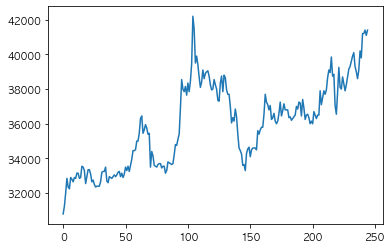

In [64]:
import matplotlib.pyplot as plt
plt.plot('Close', data=stock)
plt.show()